## Testing training and implementation by using Backpropogation 


import necessary libraries and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from two_layer_net_with_back_prop import TwoLayerNetWithBackProp
from mnist import Mnist



Load the MNIST data for training and testing

In [2]:
# Load MNIST data
mnist = Mnist()
(x_train, y_train), (x_test, y_test) = mnist.load()

train_size = x_train.shape[0]
batch_size = 16
iter_per_epoch = train_size // batch_size  # Ensure this is an integer

# Print basic dataset information
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Test data shape: (10000, 784)
Test labels shape: (10000, 10)


## Train the Model
Including the training for loop in your notebook and display the training accuracy and test accuracy at each epoch.

In [ ]:
# Initialize a two-layer neural network with specified input, hidden, and output sizes
network = TwoLayerNetWithBackProp(input_size=784, hidden_size=100, output_size=10)

# Lists to store loss and accuracy metrics for monitoring training progress
train_loss_list = []
train_acc_list = []
test_acc_list = []

# Set hyperparameters
iterations = 10000        # Total number of training iterations
learning_rate = 0.01      # Learning rate for parameter updates

# Begin training loop
for i in range(iterations):
    # Select a random mini-batch of data for this iteration
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    # Compute gradients for the current mini-batch
    grad = network.gradient(x_batch, y_batch)

    # Update the network parameters using the gradients and learning rate
    for key in network.params:
        network.params[key] -= learning_rate * grad[key]

    # Calculate and record the loss for the current mini-batch
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    # Check accuracy on training and test data at each epoch interval
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"Iteration {i}, Training accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")


TwoLayerNetWithBackProp initialized successfully!
Iteration 0, Training accuracy: 0.1050, Test accuracy: 0.1053
Iteration 3750, Training accuracy: 0.8944, Test accuracy: 0.8997
Iteration 7500, Training accuracy: 0.9142, Test accuracy: 0.9174


# Plotting and visualizing the Training Loss and Accuracy

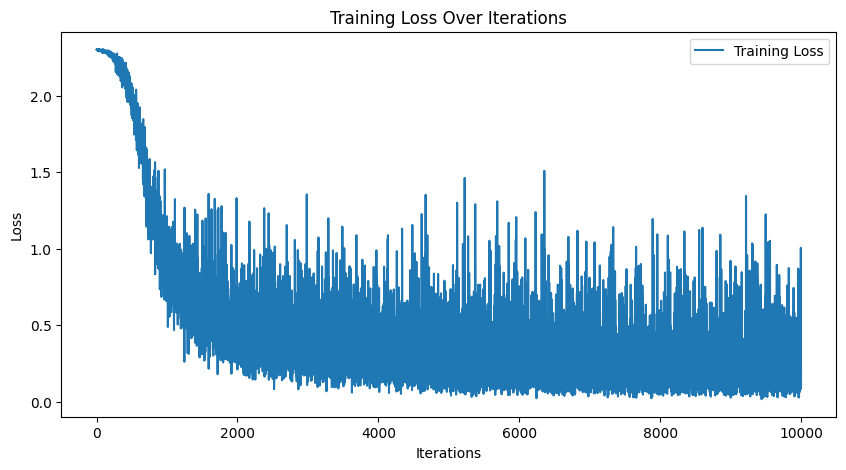

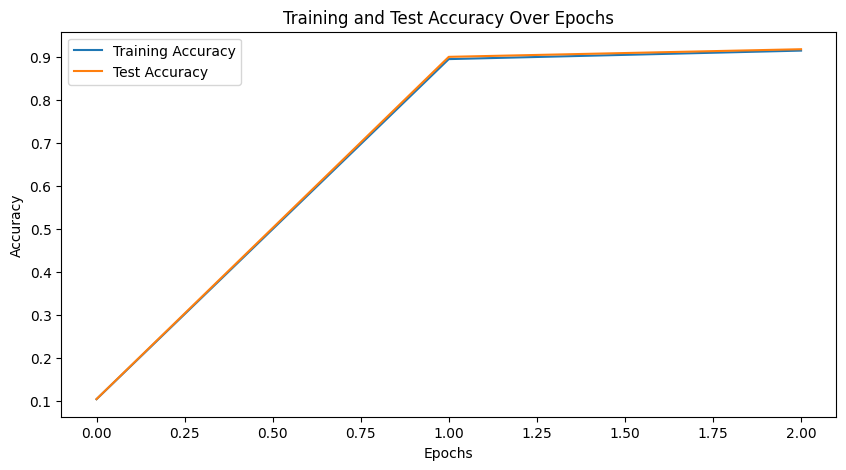

In [4]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()
plt.show()

# Plot training and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()
plt.show()


## Saving the Model

In [5]:
output_file = 'doshi_mnist_model.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(network, f)
print(f"Model saved as {output_file}")


Model saved as doshi_mnist_model.pkl


### Validate with Custom Hand-Written Digits

In [6]:
# Test the trained model with custom images
!python module6.py "0_1.png" 0
!python module6.py "1_1.png" 1
# Repeat for other images in your dataset


Figure(640x480)
Success: Image 0_1.png is recognized as 0.
Figure(640x480)
Success: Image 1_1.png is recognized as 1.
